# CORDIC Algorithm
**CO**ordinate **R**otation **DI**gital **C**omputer (CORDIC) is an algorithm which uses rotation of vector to calculate trignometric and hyperbolic functions. CORDIC algorithms as in present forms were first described by Volder in 1959 in his paper *The CORDIC Trigonometric Computing Technique*. They were first developed to replace analog resolver in B-58 bombers with digital solution.

## Working
Cordic algoritihms can operate in two modes: Rotation mode and Vector mode.
### Rotation Mode
In rotation mode coordinates of vector and an angle is supplied. Vector is rotated by the given angle to generate coordinates of final vector.

### Vector Mode 
In Vector mode coordinates of vector in supplied which is then used to rotate the vector such that it aligns with x-axis.  Vector mode thus calculates magnitude and the argument of the original vector.  

### Imports and global declarations

General import statements, we'll use matplotlib to plot graphs

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math

from __future__ import division

Maximum number of iterations that algorithm will perform

In [7]:
max_iter = 50

Variables to identify circular, linear and hyperbolic mode

In [8]:
circular = 1
linear = 0
hyperbolic = -1

Method to plot values

In [9]:
def plot(x_values, y_values, x_label, y_label, plot_label):
    # Plot of Value of gain with number of iterations
    fig = plt.figure();
    ax = fig.add_subplot(111);

    line, = ax.plot(x_values, y_values,  lw=2)

    ax.set_title(plot_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    plt.close()
    return

# Modes of CORDIC Algorithms
CORDIC algorithms is usualy operated in one of the following two modes:
* **Rotation mode** 
* **Vector mode**


## Rotation Mode

In rotation mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in rotation mode are:


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \cdot [ x_{0} \cdot cos z_{0} - y_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    x_{n} = A_{n} \cdot [ y_{0} \cdot cos z_{0} + x_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    z_{n} = 0
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

### Value of $A_{n}$ as $n \rightarrow \infty$

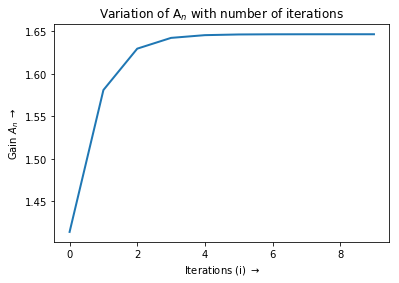

Gain of the system is 1.64675921114


In [10]:
gain_val_list = [math.sqrt(2)]  # Stores value of gain after each iteration 
max_iter_gain = 10              # Max number of iterations for calculating value of gain
iterations_list = [0]           # List that Stores the number of iterations performed

for i in range (1, max_iter_gain):
    gain_val_list.append(gain_val_list[i-1] * math.sqrt(1 + 2**(-2 * i)))
    iterations_list.append(i)

# Plot for value of gain with each iteration
plot(iterations_list, gain_val_list, 'Iterations (i) $\\rightarrow$', 'Gain $A_{n}$ $\\rightarrow$',
     'Variation of A$_{n}$ with number of iterations')
print "Gain of the system is " + str(gain_val_list[len(gain_val_list) - 1])

As evident from the plot above $A_{n} \approx 1.647$ as $n \rightarrow \infty$. $A_{n}$ is also refered as the gain of the system.

In [11]:
a = 0.607252935         # inverse of gain 1 / An

### Python implementation of Rotation mode
Returns dictionary containing one list for each x, y, z and iterations 

In [12]:
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return math.degrees(math.atan(2**(-1*iteration)))
    elif (coordinate == linear):
        return 2**(-1*iteration)
    elif (coordinate == hyperbolic):
        return math.degrees(math.atanh(2**(-1*iteration)))

In [13]:
def rotation_mode(x, y, z, coordinate, iterations):
    a = 0.607252935;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < max_iter):
            if (current_y < 0):
                di = +1
            else:
                di = -1
            next_z = current_z - di * ROM_lookup(i, coordinate)
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    print i
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list, }

##### Angle for calculation in rotation mode

In [14]:
angle = 30 # degrees

In [15]:
result_dict = rotation_mode(1, 3, 0, hyperbolic, max_iter)

1
2
3
5
6
7
8
9
10
11
12
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
41
42
43
44
45
46
47
48
49


#### Plot of $cosz_{0}$ with iterations

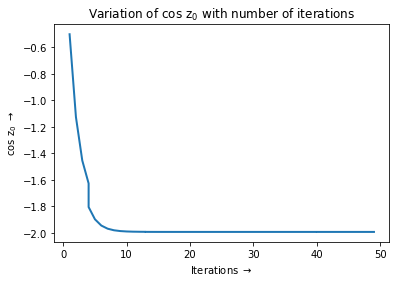

-1.99214312248


In [16]:
plot(result_dict['iteration'], result_dict['x'], 'Iterations $\\rightarrow$', 'cos z$_{0}$ $\\rightarrow$', 'Variation of cos z$_{0}$ with number of iterations')
print result_dict['x'][max_iter-2]

#### Plot of $sinz_{0}$ with iterations

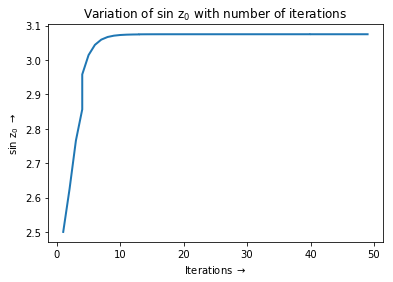

3.07496628235


In [17]:
plot(result_dict['iteration'], result_dict['y'], 'Iterations $\\rightarrow$', 'sin z$_{0}$ $\\rightarrow$', 'Variation of sin z$_{0}$ with number of iterations')
print result_dict['y'][max_iter-2]

#### Plot of z with iterations

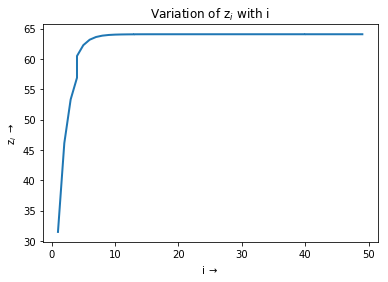

In [18]:
plot(result_dict['iteration'], result_dict['z'], 'i $\\rightarrow$', 'z$_{i}$ $\\rightarrow$', 'Variation of z$_{i}$ with i')

# Vector mode
In vector mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in vector mode are (same as rotation mode):


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \sqrt{ x_{0}^{2} - y_{0}^{2} }
\end{equation}

\begin{equation}
    y_{n} = 0
\end{equation}

\begin{equation}
    z_{n} = z_{0} + tanh^{-1}( \dfrac{y_{0}}{x_{0}} )
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

In [19]:
def vector_mode(x, y, z, iterations):
    a = 0.607252935   # = 1/K
    
    i = 0                  # Keeps count on number of iterations
    
    current_x = x          # Value of X on ith iteration 
    current_y = y      # Value of Y on ith iteration
    current_z = z          # Value of Z on ith iteration
    
    di = 0
    
    if (iterations > 0):
        for i in range(iterations):
            if (current_y < 0):
                di = +1
            else:
                di = -1
            next_z = current_z - di * math.degrees(math.atan(2**(-1*i)))
            next_x = current_x - di * current_y * 2**(-1*i)
            next_y = current_y + di * current_x * 2**(-1*i)
            
            #print current_z;
            
            current_x = next_x
            current_y = next_y
            current_z = next_z
    return { 'atan':current_z}


## Calculations for magnitude of vector

In [20]:
mag_list = []
iterations_list = []

i = 10
for i in range(1, max_iter):
    iterations_list.append(i);
    atan_list.append(vector_mode(1, 12, 0, i)['atan'])

NameError: name 'atan_list' is not defined

## Plot for tan$^{-1}$(y) with number of iterations

In [ ]:
# Plot for cos
# ----
fig = plt.figure()
ax = fig.add_subplot(111)

line, = ax.plot(iterations_list, atan_list,  lw=2)

ax.set_title('Variation of tan$^{-1}$(Y) with number of iterations')
ax.set_xlabel('Iterations (i) $-->$')
ax.set_ylabel('tan$^{-1}$(Y) $\Rightarrow$')
plt.show()
plt.close()

print "Expected value: " + str(math.degrees(math.atan(12))) + ", Got: " + str(atan_list[max_iter - 2]);

## Calculations for tan$^{-1}$(y)

In [ ]:
atan_list = [];
iterations_list = [];

i = 10;
for i in range(1, max_iter):
    iterations_list.append(i);
    atan_list.append(vector_mode(1, 12, 0, i)['atan']);

## Plot for tan$^{-1}$(y) with number of iterations

In [ ]:
# Plot for cos
# ----
fig = plt.figure();
ax = fig.add_subplot(111);

line, = ax.plot(iterations_list, atan_list,  lw=2);

ax.set_title('Variation of tan$^{-1}$(Y) with number of iterations');
ax.set_xlabel('Iterations (i) $-->$');
ax.set_ylabel('tan$^{-1}$(Y) $\Rightarrow$');
plt.show();
plt.close();

print "Expected value: " + str(math.degrees(math.atan(12))) + ", Got: " + str(atan_list[max_iter - 2]);

## Magnitude of a vector

In [ ]:
math.sin(math.pi)

# References
1. [*A survey of CORDIC algorithms for FPGA based computers*](http://portal.acm.org/citation.cfm?doid=275107.275139) by Andraka, Ray (1998).
2. *Cordic_Architeutre - QIP STC-Image Processing using VLSI architecture* by Das, Bishnu Prasad (2016)

In [ ]:
print math.sinh(30);print math.cosh(30)